# LOGISTIC with Chat GPT
> ShoulderFly

In [3]:
# Import the necessary modules
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Load the dataset into a pandas DataFrame
df = pd.read_csv('/Users/paoloartasensi/Python_Scripts/artabax/Gdrive_csv/TEST_20221224_0205PM.csv')

df.head()


,Time,Ax,Ay,Az,Gx,Gy,Gz,status,mov,pitch,roll,P,R,prob
0,1671887016664,0.019073,9.381882,2.758102,2.423460,0.142505,-6.117227,1,moving,-72.643410,-0.190210,-73.617253,0.396219,0
1,1671887016796,-0.046326,8.934418,2.633667,7.742484,-4.547048,0.427515,1,moving,-73.573257,-1.007718,-73.573256,-1.007718,0
2,1671887016911,0.016678,8.711090,2.242844,-2.231122,-4.896754,0.041965,1,moving,-75.561287,0.426045,-75.561269,0.426045,0
3,1671887017032,-0.005646,7.454865,1.450821,-14.271489,-6.471304,-0.937211,1,moving,-78.987045,-0.222961,-78.987018,-0.222961,0
4,1671887017146,-0.126083,6.051865,2.486908,-12.731035,9.277692,6.132089,1,moving,-67.634789,-2.902345,-67.634779,-2.902345,0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Select the columns containing the accelerometer and gyroscope data, plus Pitch&Roll
X = df[['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz', 'pitch', 'roll',]]

# Select the column containing the labels (0 for non-rep, 1 for rep)
y = df['status']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier on the training data
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy*100))


from sklearn.metrics import accuracy_score, precision_score, recall_score
#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)


Accuracy: 95.03%
Accuracy: 0.9503105590062112
Precision: 0.9242424242424242
Recall: 0.953125


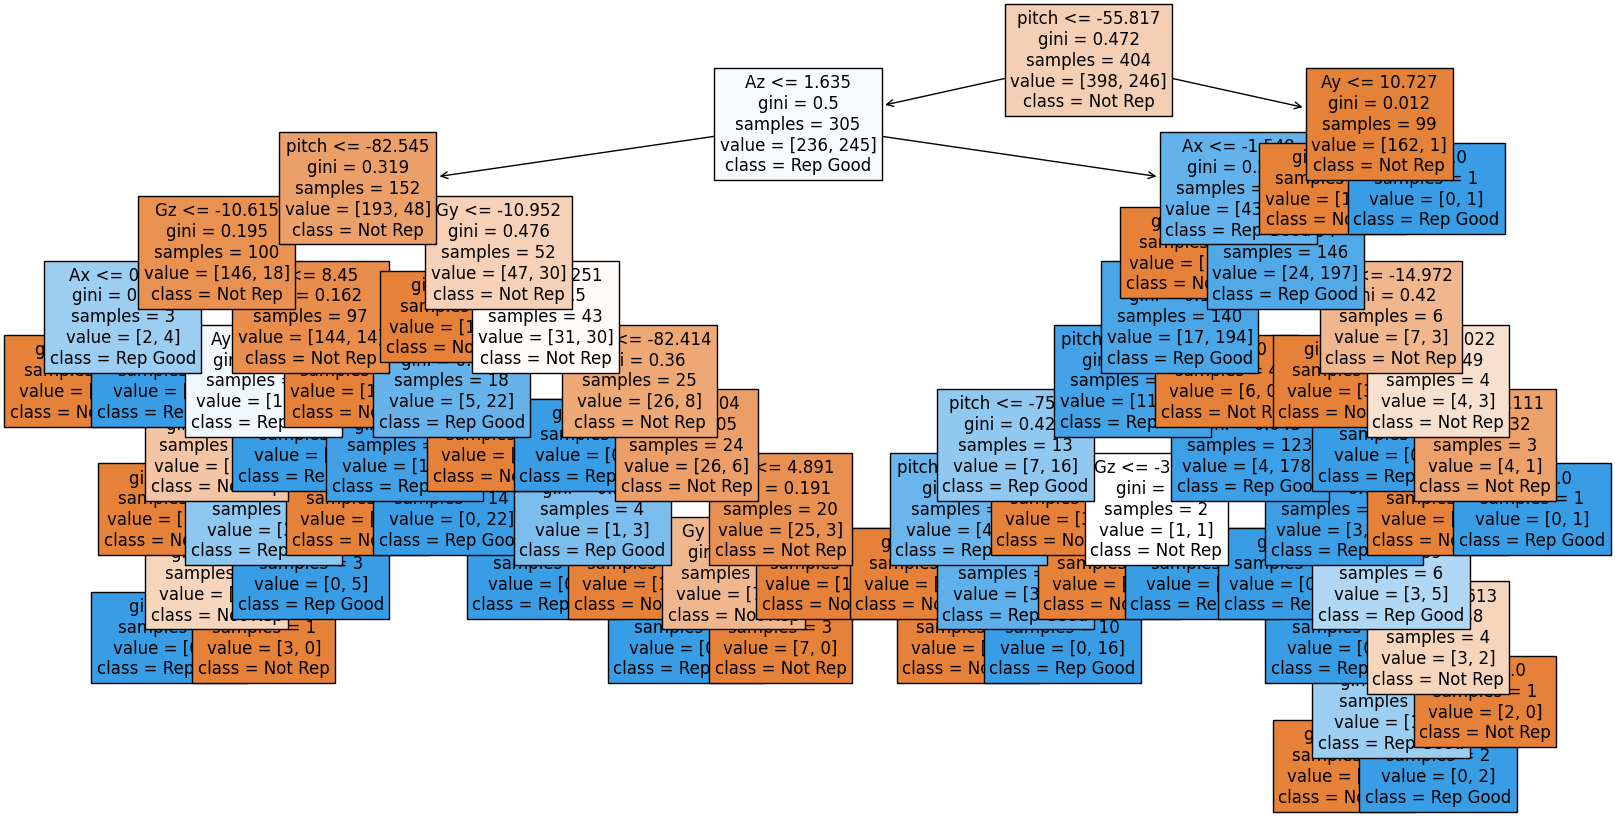

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Get the first decision tree in the random forest
tree = model.estimators_[0]
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, class_names=['Not Rep', 'Rep Good'], filled=True, fontsize=12)
plt.show()

# LOGISTIC REGRESSION

In [7]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Train a logistic regression model on the training data
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy*100))

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)


Accuracy: 76.40%
Accuracy: 0.7639751552795031
Precision: 0.6388888888888888
Recall: 0.7931034482758621


> PESI

In [8]:
# Print the weights (coefficients) for each feature with their corresponding labels (feature names)
for feature, coef in zip(X.columns, model.coef_[0]):
    print('{}: {}'.format(feature, coef))
print("b0",model.intercept_)

Ax: 0.3387035843695002
Ay: -0.4335112659202298
Az: 1.7908803329732021
Gx: -0.010440665024444823
Gy: 0.005738643178693175
Gz: -0.002949378975070526
pitch: -0.28912966356278225
roll: -0.024600370890183867
b0 [-21.95266431]


## CONFUSION COLORED MATRIX

       Logistic
Reg            
Az      1.79088
Ay    -0.433511
Ax     0.338704
pitch  -0.28913
roll    -0.0246
Gx    -0.010441
Gy     0.005739
Gz    -0.002949
b0: -21.95266430830549


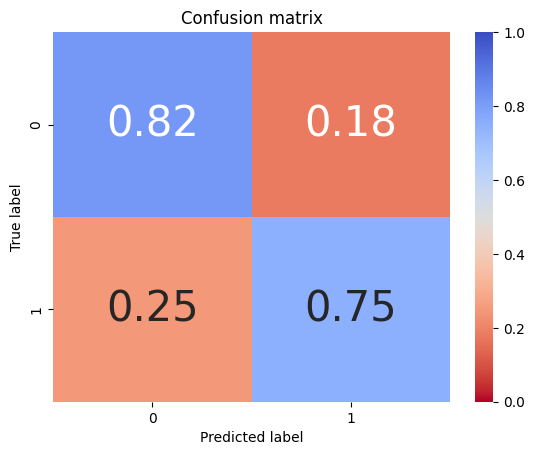

In [11]:
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss, precision_score, recall_score
import seaborn as sns


log_reg = LogisticRegression(random_state=None, solver = 'lbfgs', max_iter=1000)
log_reg.fit(X_train, y_train)

# predict - Predict class labels for samples in X
y_pred = log_reg.predict(X_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_

lr = pd.DataFrame(data =[X_train.columns, np.array(log_reg.coef_[0]).tolist()]).T
lr.rename(columns={0:'Reg',1:'Logistic'}, inplace=True)
lr.set_index('Reg', inplace=True)
lr.sort_values(by='Logistic', key=abs, ascending=False , inplace=True)
print(lr)
print('b0:',log_reg.intercept_[0])


def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="coolwarm_r", 
                    xticklabels=classes, 
                    yticklabels=classes, 
                    vmin=0., vmax=1., 
                    annot=True, annot_kws={'size':30}
                    )
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Visualizing cm

cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

LogReg Training Accuracy is:  0.7919254658385093
LogReg Testing Accuracy is:  0.7639751552795031


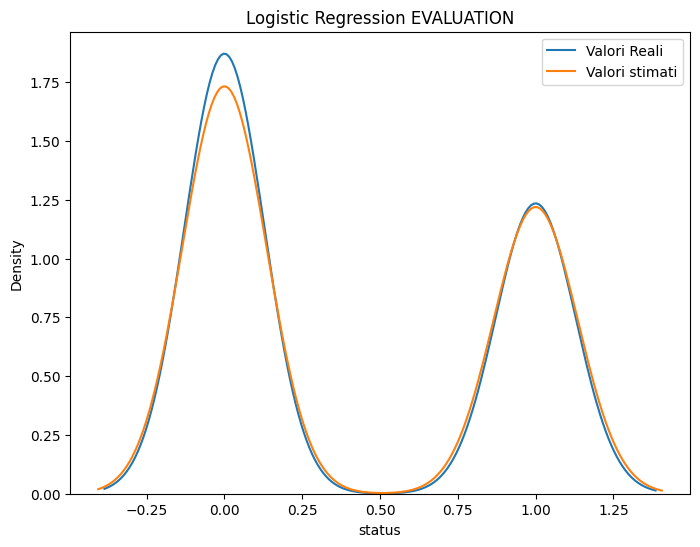

In [13]:
'''Logistic Regression EVALUATION'''

# Accuracy on Train
print("LogReg Training Accuracy is: ", log_reg.score(X_train, y_train))
# Accuracy on Test
print("LogReg Testing Accuracy is: ", log_reg.score(X_test, y_test))
# Classification Report

plt.figure(figsize=(8, 6))
plt.title('Logistic Regression EVALUATION')
sns.kdeplot(data=df, x='status' , label='Valori Reali')
sns.kdeplot(y_pred , label='Valori stimati')
plt.legend()
plt.show()